### Exercise 6

### Testing stratified_train_test_split

In [1]:
from si.io.csv_file import read_csv
from si.model_selection.split import stratified_train_test_split
iris = read_csv('/home/pauloseixal/Github/si/datasets/iris/iris.csv',sep=',',features=True, label=True)

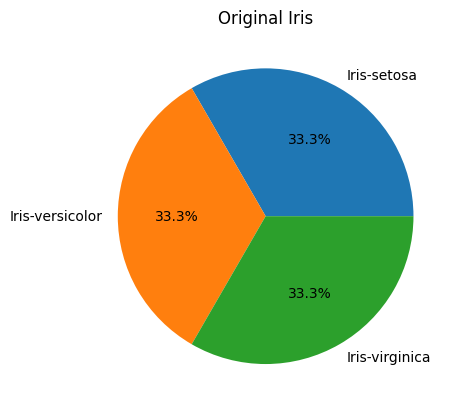

In [2]:
import numpy as np
import matplotlib.pyplot as plt

labels, counts = np.unique(iris.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Original Iris')
plt.show()


In [3]:
dataset_train, dataset_test = stratified_train_test_split(iris, test_size=0.2)

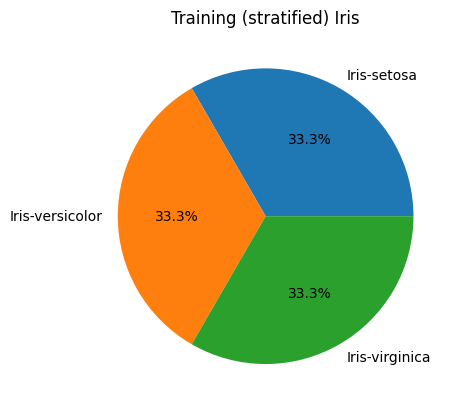

In [4]:
labels, counts = np.unique(dataset_train.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Training (stratified) Iris')
plt.show()

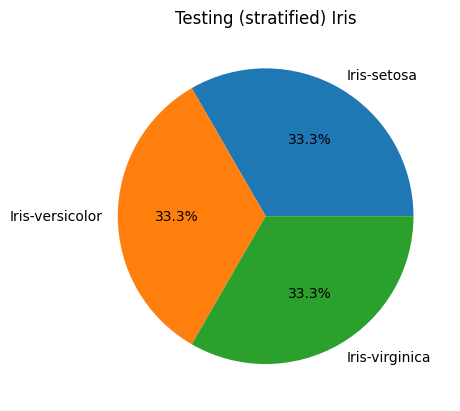

In [5]:
labels, counts = np.unique(dataset_test.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Testing (stratified) Iris')
plt.show()

### Comparison with non-stratified train_test_split

In [6]:
from si.model_selection.split import train_test_split
dataset_train, dataset_test = train_test_split(iris, test_size=0.2)

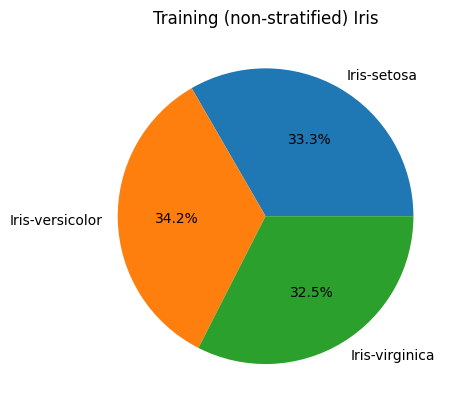

In [7]:
labels, counts = np.unique(dataset_train.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Training (non-stratified) Iris')
plt.show()

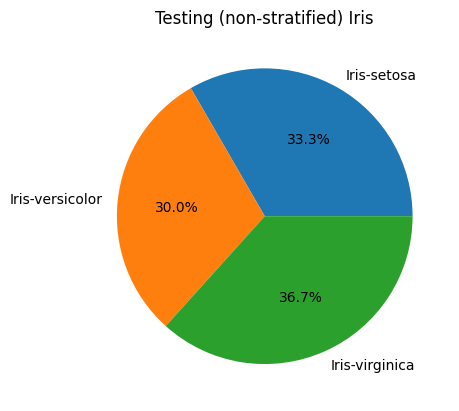

In [8]:
labels, counts = np.unique(dataset_test.y, return_counts=True)
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Testing (non-stratified) Iris')
plt.show()

### Exercise 7

### Testing KNNRegressor

In [9]:
cpu = read_csv('/home/pauloseixal/Github/si/datasets/cpu/cpu.csv',sep=',',features=True, label=True)

In [10]:
from si.models.knn_regressor import KNNRegressor

dataset_train, dataset_test = train_test_split(cpu, test_size=0.2)

# initialize the KNN classifier
knn = KNNRegressor(k=3)

# fit the model to the train dataset
knn.fit(dataset_train)

# evaluate the model on the test dataset
score = knn.score(dataset_test)
print(f'The RMSE of the model is: {score}')

The RMSE of the model is: 81.36259969252635


### Comparing with sklearn's KNeighborsRegressor

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

dataset_train, dataset_test = train_test_split(cpu, test_size=0.2)

# initialize the KNN classifier
knn = KNeighborsRegressor(n_neighbors=3)

# fit the model to the train dataset
knn.fit(dataset_train.X, dataset_train.y)

# evaluate the model on the test dataset
score = mean_squared_error(dataset_test.y, knn.predict(dataset_test.X), squared=False)
print(f'The RMSE of the model is: {score}')
    

The RMSE of the model is: 81.36153382890387
